<a href="https://colab.research.google.com/github/JosiasSekhebesa/RANDOM/blob/main/starter_notebook_edsa_classification_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import the necessary libraries

In [2]:
!pip install contractions

     |████████████████████████████████| 317kB 5.9MB/s 
     |████████████████████████████████| 245kB 11.0MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.0-cp36-cp36m-linux_x86_64.whl size=81700 sha256=437f0c02803fad0b4c4839f63cc83c4a1655635d0141c295609c6a56d860378b
  Stored in directory: /root/.cache/pip/wheels/0a/90/61/87a55f5b459792fbb2b7ba6b31721b06ff5cf6bde541b40994
Successfully built pyahocorasick


In [3]:
import pandas as pd
import numpy as np
import nltk
import string
import re
import contractions
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

from nltk.tokenize import word_tokenize



from google.colab import files

from sklearn.metrics import f1_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pip install nltk

In [5]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [8]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

## Load in your data from kaggle.  
By working in a kaggle kernel, you can access the data directly from the competition, as well as make your submission without downloading your output file

In [ ]:
#uploaded = files.upload()

Saving train.csv to train (1).csv


In [ ]:
#uploaded = files.upload()

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [12]:
train.sentiment.value_counts()

 1    4057
 2    1783
 0    1150
-1     613
Name: sentiment, dtype: int64

In [13]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221.0
1,1,It's not like we lack evidence of anthropogeni...,126103.0
2,2,RT @RawStory: Researchers say we have three ye...,698562.0
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736.0
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954.0


In [14]:
for col in train.columns:
    print(col, train[col].isnull().sum())

sentiment 0
message 0
tweetid 1


# Remove Retweets

# Expanding contractions

In [15]:
train['message'] = train['message'].apply(lambda x: contractions.fix(x))

In [16]:
train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief does not think carbon d...,625221.0
1,1,it is not like we lack evidence of anthropogen...,126103.0
2,2,RT @RawStory: Researchers say we have three ye...,698562.0
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736.0
4,1,"RT @SoyNovioDeTodas: it is 2016, and a racist,...",466954.0


## Tokenization

In [20]:
#train['tokenized_message'] = train['message'].apply(word_tokenize)
train['message'] = train['message'].apply(word_tokenize)
train.head()

,sentiment,message,tweetid
0,1,"[PolySciMajor, EPA, chief, does, not, think, c...",625221.0
1,1,"[it, is, not, like, we, lack, evidence, of, an...",126103.0
2,2,"[RT, @, RawStory, :, Researchers, say, we, hav...",698562.0
3,1,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",573736.0
4,1,"[RT, @, SoyNovioDeTodas, :, it, is, 2016, ,, a...",466954.0


##Converting all Characters to Lowercase

In [21]:
train['message'] = train['message'].apply(lambda x: [word.lower() for word in x])
train.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, does, not, think, c...",625221.0
1,1,"[it, is, not, like, we, lack, evidence, of, an...",126103.0
2,2,"[rt, @, rawstory, :, researchers, say, we, hav...",698562.0
3,1,"[#, todayinmaker, #, wired, :, 2016, was, a, p...",573736.0
4,1,"[rt, @, soynoviodetodas, :, it, is, 2016, ,, a...",466954.0


##Removing Punctuations

In [22]:
punc = string.punctuation
train['message'] = train['message'].apply(lambda x: [word for word in x if word not in punc])
train.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, does, not, think, c...",625221.0
1,1,"[it, is, not, like, we, lack, evidence, of, an...",126103.0
2,2,"[rt, rawstory, researchers, say, we, have, thr...",698562.0
3,1,"[todayinmaker, wired, 2016, was, a, pivotal, y...",573736.0
4,1,"[rt, soynoviodetodas, it, is, 2016, and, a, ra...",466954.0


##Removing stop words

In [23]:
stop_words = set(stopwords.words('english'))
train['message'] = train['message'].apply(lambda x: [word for word in x if word not in stop_words])
train.head()

,sentiment,message,tweetid
0,1,"[polyscimajor, epa, chief, think, carbon, diox...",625221.0
1,1,"[like, lack, evidence, anthropogenic, global, ...",126103.0
2,2,"[rt, rawstory, researchers, say, three, years,...",698562.0
3,1,"[todayinmaker, wired, 2016, pivotal, year, war...",573736.0
4,1,"[rt, soynoviodetodas, 2016, racist, sexist, cl...",466954.0


##Lemmatization 

In [24]:
#from nltk.corpus import  wordnet
wnl = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
train['pos_tags'] = train['message'].apply(nltk.tag.pos_tag)
train['wordnet_pos'] = train['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])

train['message'] = train['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
train.head()

,sentiment,message,tweetid,pos_tags,wordnet_pos
0,1,"[polyscimajor, epa, chief, think, carbon, diox...",625221.0,"[(polyscimajor, JJ), (epa, NN), (chief, NN), (...","[(polyscimajor, a), (epa, n), (chief, n), (thi..."
1,1,"[like, lack, evidence, anthropogenic, global, ...",126103.0,"[(like, IN), (lack, NN), (evidence, NN), (anth...","[(like, n), (lack, n), (evidence, n), (anthrop..."
2,2,"[rt, rawstory, researcher, say, three, year, a...",698562.0,"[(rt, NN), (rawstory, NN), (researchers, NNS),...","[(rt, n), (rawstory, n), (researchers, n), (sa..."
3,1,"[todayinmaker, wire, 2016, pivotal, year, war,...",573736.0,"[(todayinmaker, NN), (wired, VBD), (2016, CD),...","[(todayinmaker, n), (wired, v), (2016, n), (pi..."
4,1,"[rt, soynoviodetodas, 2016, racist, sexist, cl...",466954.0,"[(rt, NN), (soynoviodetodas, NN), (2016, CD), ...","[(rt, n), (soynoviodetodas, n), (2016, n), (ra..."


# EDA Section

* More visuals will be built on cleaned data, as discussed in the meeting. 

Text(0.5, 1.05, 'Sentiments Frequency Count')

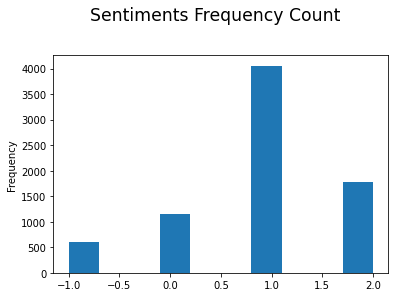

In [25]:
train["sentiment"].plot.hist()
# set title and axis labels
plt.suptitle('Sentiments Frequency Count', x=0.5, y=1.05, ha='center', fontsize='xx-large')

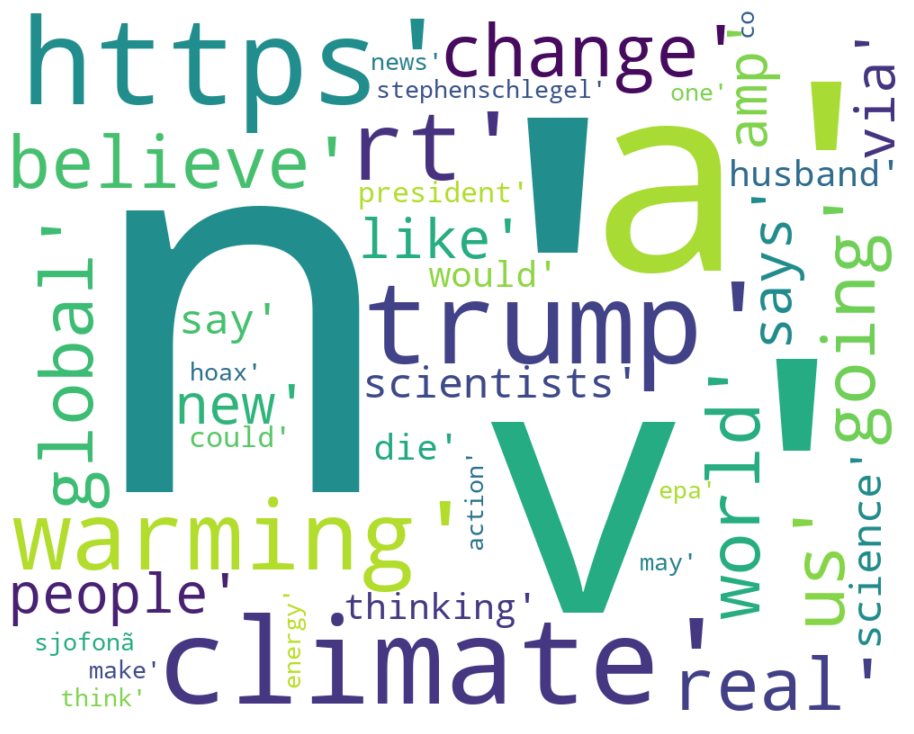

In [26]:
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator

words = train['wordnet_pos']
allwords = []
for wordlist in words:
    allwords += wordlist
    
mostcommon = FreqDist(allwords).most_common(50)
wordcloud = WordCloud(width=1000, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Splitting out the X variable from the target

In [ ]:
y = train['sentiment']
X = train['message']


## Turning text into something your model can read

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=2, stop_words="english")
X_vectorized = vectorizer.fit_transform(X)

AttributeError: ignored

## Splitting the training data into a training and validation set

In [ ]:
X_train,X_val,y_train,y_val = train_test_split(X_vectorized,y,test_size=.3,shuffle=True, stratify=y, random_state=11)

## Training the model and evaluating using the validation set 

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_val)

## Checking the performance of our model on the validation set

In [ ]:
f1_score(y_val, rfc_pred, average="macro")

## Getting our test set ready 

In [ ]:
testx = test['message']
test_vect = vectorizer.transform(testx)

## Making predictions on the test set and adding a sentiment column to our original test df

In [ ]:
y_pred = rfc.predict(test_vect)

In [ ]:
test['sentiment'] = y_pred

In [ ]:
test.head()

## Creating an output csv for submission

In [ ]:
test[['tweetid','sentiment']].to_csv('testsubmission.csv', index=False)